In [87]:

# Decision Tree Terminologies
# 1 Root Node: Root node is from where the decision tree starts. It represents the entire dataset, which further gets divided into two or more homogeneous sets.
# 2 Leaf Node: Leaf nodes are the final output node, and the tree cannot be segregated further after getting a leaf node.
# 3 Splitting: Splitting is the process of dividing the decision node/root node into sub-nodes according to the given conditions.
# 4 Branch/Sub Tree: A tree formed by splitting the tree.
# 5 Pruning: Pruning is the process of removing the unwanted branches from the tree.
# 6 Parent/Child node: The root node of the tree is called the parent node, and other nodes are called the child nodes.


#***************************************************************************************************************************************
# While implementing a Decision tree, the main issue arises that how to select the best attribute for the root node and for sub-nodes. 
#So, to solve such problems there is a technique which is called as Attribute selection measure or ASM. 
#By this measurement, we can easily select the best attribute for the nodes of the tree. There are two popular techniques for ASM, which are:

# Information Gain
# Gini Index

#Information Gain:
#Information gain is the measurement of changes in entropy after the segmentation of a dataset based on an attribute.
# It calculates how much information a feature provides us about a class.
# According to the value of information gain, we split the node and build the decision tree.
# A decision tree algorithm always tries to maximize the value of information gain, and a node/attribute having the highest information gain is split first. It can be calculated using the below formula:
######## Information Gain= Entropy(S)- [(Weighted Avg) *Entropy(each feature)  

#Entropy:Entropy is the measure of impurity a features might have and then selecting the one with least impurity.Entropy value is nothing but sort of randomness
######Entropy(s)= -P(yes)log2 P(yes)- P(no) log2 P(no)

#2. Gini Index:
# Gini index is a measure of impurity or purity used while creating a decision tree in the CART(Classification and Regression Tree) algorithm.
# An attribute with the low Gini index should be preferred as compared to the high Gini index.
# It only creates binary splits, and the CART algorithm uses the Gini index to create binary splits.
# #####Gini index can be calculated using the below formula:Gini Index= 1- ∑jPj^2



In [88]:
#okay so today we will be looking into decision tree and how to visualize it with ploting and graphviz as well
#lets start
#import libraries
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn import tree


In [89]:

data=load_iris()
irisdf=pd.DataFrame(data=data.data,columns=data.feature_names)
irisdf['target']=data.target
# print(irisdf.head(20))
# print(data.target_names)
# print(data.feature_names)

In [90]:
x_train,x_test,y_train,y_test=train_test_split(irisdf.iloc[:,0:3],irisdf.iloc[:,4],random_state=0,test_size=0.25)
#print(x_train,x_test,y_train,y_test)

In [91]:
#making an instantance of the Model
clf=DecisionTreeClassifier(max_depth=2,random_state=0)
clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)

[Text(133.92000000000002, 181.2, 'petal length (cm) <= 2.35\ngini = 0.665\nsamples = 112\nvalue = [37, 34, 41]\nclass = virginica'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]\nclass = setosa'),
 Text(200.88000000000002, 108.72, 'petal length (cm) <= 4.95\ngini = 0.496\nsamples = 75\nvalue = [0, 34, 41]\nclass = virginica'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.153\nsamples = 36\nvalue = [0, 33, 3]\nclass = versicolor'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.05\nsamples = 39\nvalue = [0, 1, 38]\nclass = virginica')]

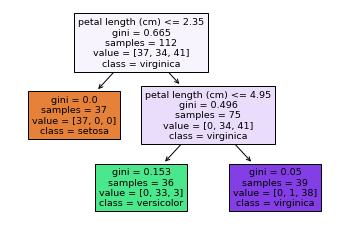

In [92]:
tree.plot_tree(clf,feature_names=data.feature_names,class_names=data.target_names,filled=True)

In [93]:
from sklearn.metrics import accuracy_score

x=accuracy_score(y_test,y_pred,normalize=True)
print(x)

0.8947368421052632


In [94]:
data2=load_breast_cancer()
df=pd.DataFrame(data=data2.data,columns=data2.feature_names)
# print(df.head(4))

df['target']=data2.target

In [95]:
X=df.loc[:,df.columns!='target']

y=df.loc[:,'target'].values


In [96]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

#now we use random forest for this dataset
clf2=DecisionTreeClassifier(random_state=0)
rf=RandomForestClassifier(n_estimators=100,criterion='gini',random_state=0)
rf.fit(x_train,y_train)
clf.fit(x_train,y_train)


DecisionTreeClassifier(max_depth=2, random_state=0)

In [97]:
y_pred1=clf.predict(x_test)
y_pred2=rf.predict(x_test)

[Text(167.4, 181.2, 'worst concave points <= 0.142\ngini = 0.462\nsamples = 455\nvalue = [165, 290]\nclass = benign'),
 Text(83.7, 108.72, 'worst area <= 957.45\ngini = 0.146\nsamples = 303\nvalue = [24, 279]\nclass = benign'),
 Text(41.85, 36.23999999999998, 'gini = 0.073\nsamples = 288\nvalue = [11, 277]\nclass = benign'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.231\nsamples = 15\nvalue = [13, 2]\nclass = malignant'),
 Text(251.10000000000002, 108.72, 'worst area <= 729.55\ngini = 0.134\nsamples = 152\nvalue = [141, 11]\nclass = malignant'),
 Text(209.25, 36.23999999999998, 'gini = 0.49\nsamples = 14\nvalue = [6, 8]\nclass = benign'),
 Text(292.95, 36.23999999999998, 'gini = 0.043\nsamples = 138\nvalue = [135, 3]\nclass = malignant')]

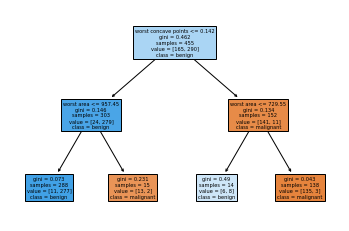

In [98]:
tree.plot_tree(clf,feature_names =data2.feature_names , class_names=data2.target_names,filled = True)

[Text(200.88000000000002, 206.56799999999998, 'area error <= 30.95\ngini = 0.456\nsamples = 291\nvalue = [160, 295]\nclass = benign'),
 Text(120.528, 184.824, 'worst radius <= 16.225\ngini = 0.197\nsamples = 194\nvalue = [34, 273]\nclass = benign'),
 Text(80.352, 163.07999999999998, 'symmetry error <= 0.049\ngini = 0.097\nsamples = 173\nvalue = [14, 261]\nclass = benign'),
 Text(66.96000000000001, 141.336, 'worst symmetry <= 0.375\ngini = 0.051\nsamples = 171\nvalue = [7, 261]\nclass = benign'),
 Text(40.176, 119.592, 'worst concave points <= 0.198\ngini = 0.03\nsamples = 167\nvalue = [4, 260]\nclass = benign'),
 Text(26.784000000000002, 97.848, 'worst radius <= 14.465\ngini = 0.015\nsamples = 166\nvalue = [2, 260]\nclass = benign'),
 Text(13.392000000000001, 76.10399999999998, 'gini = 0.0\nsamples = 134\nvalue = [0, 218]\nclass = benign'),
 Text(40.176, 76.10399999999998, 'worst perimeter <= 93.57\ngini = 0.087\nsamples = 32\nvalue = [2, 42]\nclass = benign'),
 Text(26.784000000000002

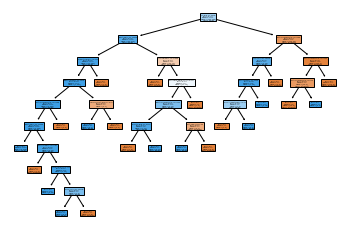

In [85]:
tree.plot_tree(rf.estimators_[5],feature_names =data2.feature_names , class_names=data2.target_names,filled = True)

In [99]:
x=accuracy_score(y_test,y_pred2)
print(x)

0.9649122807017544


In [100]:
x=accuracy_score(y_test,y_pred1)
print(x)

0.9649122807017544
